In [34]:
# Initialize Otter
import otter
grader = otter.Notebook("check_particle_filter.ipynb")

# Particle filter 

This Jupyter notebook file imports (and tests) all of the code needed to do the particle filter assignment. Note that the actual code is in the .py files in this directory.

You should only have to edit particle_filter.py - you did all the "simulator" code in the previous two assignments.

Note that, although we use both sensors in this assignment, we'll only use one at a time, and update the particle distribution (importance sampling) before calling a calculate_weights method again.

Slides for this assignment: https://docs.google.com/presentation/d/1GVCAWUSUhJiHP6VBi-HusDyZmunQG1mnVlopLhtRGLs/edit?usp=sharing

In [35]:
import sys; sys.path.insert(0, '.')
import numpy as np
import pdfkit
import matplotlib.pyplot as plt

# These commands will force JN to actually re-load the external file when you re-execute the import command
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [36]:
from particle_filter import ParticleFilter, test_particle_filter_syntax
from world_ground_truth import WorldGroundTruth
from robot_sensors import RobotSensors
from robot_ground_truth import RobotGroundTruth

In [37]:
# Declare variables
n_doors = 2
n_bins = 10
n_samples = 100
world_ground_truth = WorldGroundTruth()
world_ground_truth.random_door_placement(n_doors, n_bins)
robot_ground_truth = RobotGroundTruth()
robot_sensor = RobotSensors()
particle_filter = ParticleFilter()

In [38]:
# Syntax check 1, reset probabilities
particle_filter.reset_particles(n_samples)

In [39]:
# Syntax check 2, update move
particle_filter.update_particles_move_continuous(robot_ground_truth, 0.1)

In [40]:
# Syntax checks 3 and 4 - the two different sensor readings
particle_filter.calculate_weights_door_sensor_reading(world_ground_truth, robot_sensor, True)
if np.isclose(np.max(particle_filter.weights), np.min(particle_filter.weights)):
    print(f"Possible error: The weights should not all be the same")

particle_filter.reset_particles(n_samples)
particle_filter.calculate_weights_distance_wall(robot_sensor, 0.1)
if np.isclose(np.max(particle_filter.weights), np.min(particle_filter.weights)):
    print(f"Possible error: The weights should not all be the same")

In [41]:
# Syntax check 5 - importance sampling
particle_filter.resample_particles()
if not np.isclose(np.max(particle_filter.weights), np.min(particle_filter.weights)):
    print(f"Possible error: The weights should be set back to all the same")
if np.unique(particle_filter.particles, return_counts=True) == n_samples:
    print(f"Possible error: There probably should be duplicate particles {np.unique(particle_filter.particles, return_counts=True)} {n_samples}")

In [42]:
# Syntax checks 6 and 7 - the two full updates
particle_filter.one_full_update_door(world_ground_truth, robot_ground_truth, robot_sensor, u=0.1, z=True)
particle_filter.one_full_update_distance(robot_ground_truth, robot_sensor, u=0.1, z=0.6)

In [43]:
test_particle_filter_syntax(b_print=True)

Testing particle filter (syntax)
Should be approximately equal, seq: ['Door']
[ True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True]
Your h: [0.045 0.046 0.043 0.069 0.066 0.023 0.048 0.035 0.061 0.076 0.071 0.011
 0.053 0.076 0.014 0.043 0.058 0.033 0.065 0.064]
Approximate h: [0.045 0.046 0.043 0.069 0.066 0.023 0.048 0.035 0.061 0.076 0.071 0.011
 0.053 0.076 0.014 0.043 0.058 0.033 0.065 0.064]

Should be approximately equal, seq: ['Dist']
[ True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True]
Your h: [0.    0.    0.    0.001 0.003 0.012 0.033 0.046 0.109 0.172 0.224 0.168
 0.137 0.055 0.031 0.007 0.002 0.    0.    0.   ]
Approximate h: [0.    0.    0.    0.001 0.003 0.012 0.033 0.046 0.109 0.172 0.224 0.168
 0.137 0.055 0.031 0.007 0.002 0.    0.    0.   ]

Should be approximately equal, seq: ['Move']
[ True  True  True  True  True  True  True  Tr

True

In [44]:
grader.check("syntax_check")

syntax_check results: All test cases passed!

<!-- BEGIN QUESTION -->

## Door sensor
Did you calculate the door sensor correctly?

Tall particles in door if sensor is True, otherwise, short particles in doors.

(-0.052362500000000006, 1.0501125, -0.037500000000000006, 0.7875)

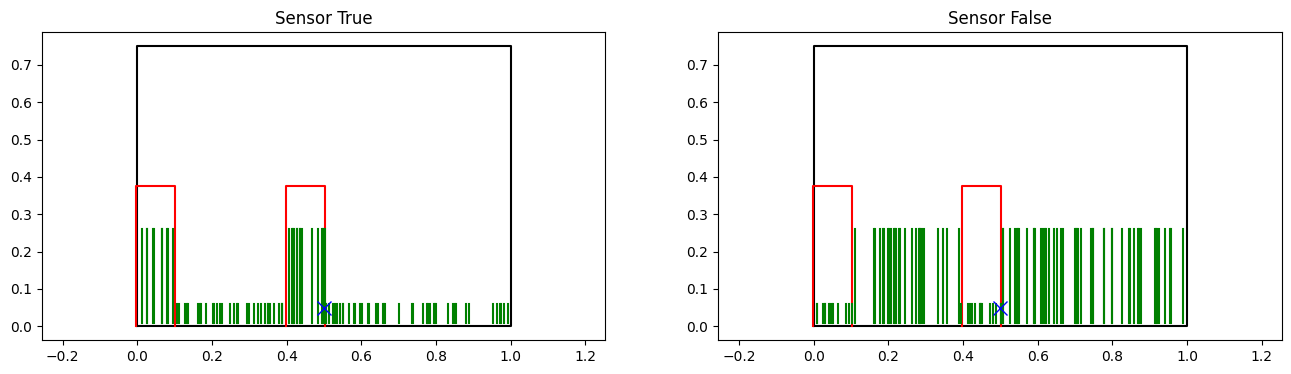

In [45]:
fig, axs = plt.subplots(1, 2, figsize=(16, 4))

n_doors = 2
n_bins = 10
n_particles = 100
np.random.seed(2)

# Initialize with values that are NOT the default ones
world_ground_truth.random_door_placement(n_doors, n_bins)

# Two cases - sensor returned True or False
axs[0].set_title("Sensor True")
particle_filter.reset_particles(n_particles)
particle_filter.calculate_weights_door_sensor_reading(world_ground_truth, robot_sensor, True)
particle_filter.plot_particles_with_weights(axs[0], world_ground_truth, robot_ground_truth)
axs[0].axis('equal')

axs[1].set_title("Sensor False")
particle_filter.reset_particles(n_particles)
particle_filter.calculate_weights_door_sensor_reading(world_ground_truth, robot_sensor, False)
particle_filter.plot_particles_with_weights(axs[1], world_ground_truth, robot_ground_truth)
axs[1].axis('equal')


<!-- END QUESTION -->

<!-- BEGIN QUESTION -->

## Distance sensor - is your distance sensor setting correct values?
Should show a Gaussian centered at the distance input

(-0.052362500000000006, 1.0501125, -0.037500000000000006, 0.7875)

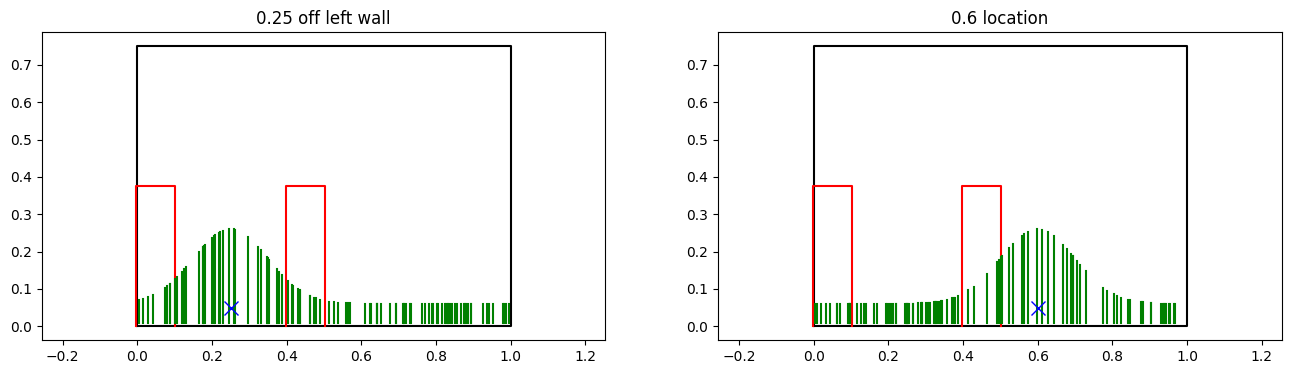

In [46]:
fig, axs = plt.subplots(1, 2, figsize=(16, 4))

# Two cases - sensor returned 0.25 or 0.6
axs[0].set_title("0.25 off left wall")
robot_ground_truth.robot_loc = 0.25
particle_filter.reset_particles(n_particles)
particle_filter.calculate_weights_distance_wall(robot_sensor, 0.25)
particle_filter.plot_particles_with_weights(axs[0], world_ground_truth, robot_ground_truth)
axs[0].axis('equal')

axs[1].set_title("0.6 location")
robot_ground_truth.robot_loc = 0.6
particle_filter.reset_particles(n_particles)
particle_filter.calculate_weights_distance_wall(robot_sensor, 0.6)
particle_filter.plot_particles_with_weights(axs[1], world_ground_truth, robot_ground_truth)
axs[1].axis('equal')

<!-- END QUESTION -->

<!-- BEGIN QUESTION -->

## Importance weighting/resampling
Do you resample the particles correctly? More particles in "bump"

(-0.052362500000000006, 1.0501125, -0.037500000000000006, 0.7875)

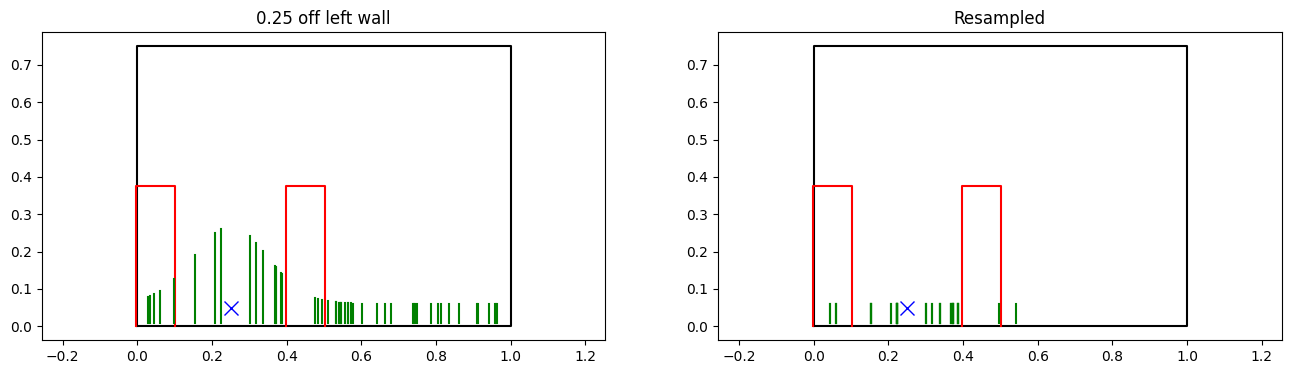

In [47]:
fig, axs = plt.subplots(1, 2, figsize=(16, 4))

n_particles = 50
# Sensor reading first, to calculate weights
axs[0].set_title("0.25 off left wall")
robot_ground_truth.robot_loc = 0.25
particle_filter.reset_particles(n_particles)
particle_filter.calculate_weights_distance_wall(robot_sensor, 0.25)
particle_filter.plot_particles_with_weights(axs[0], world_ground_truth, robot_ground_truth)
axs[0].axis('equal')

# Now resample
axs[1].set_title("Resampled")
particle_filter.resample_particles()
particle_filter.plot_particles_with_weights(axs[1], world_ground_truth, robot_ground_truth)
axs[1].axis('equal')

<!-- END QUESTION -->

<!-- BEGIN QUESTION -->

## Robot moves
Do the particles shift? All should pile up on the left (or right) side, depending on the move direction.
Also should spread out over time

(-0.052362500000000006, 1.0501125, -0.037500000000000006, 0.7875)

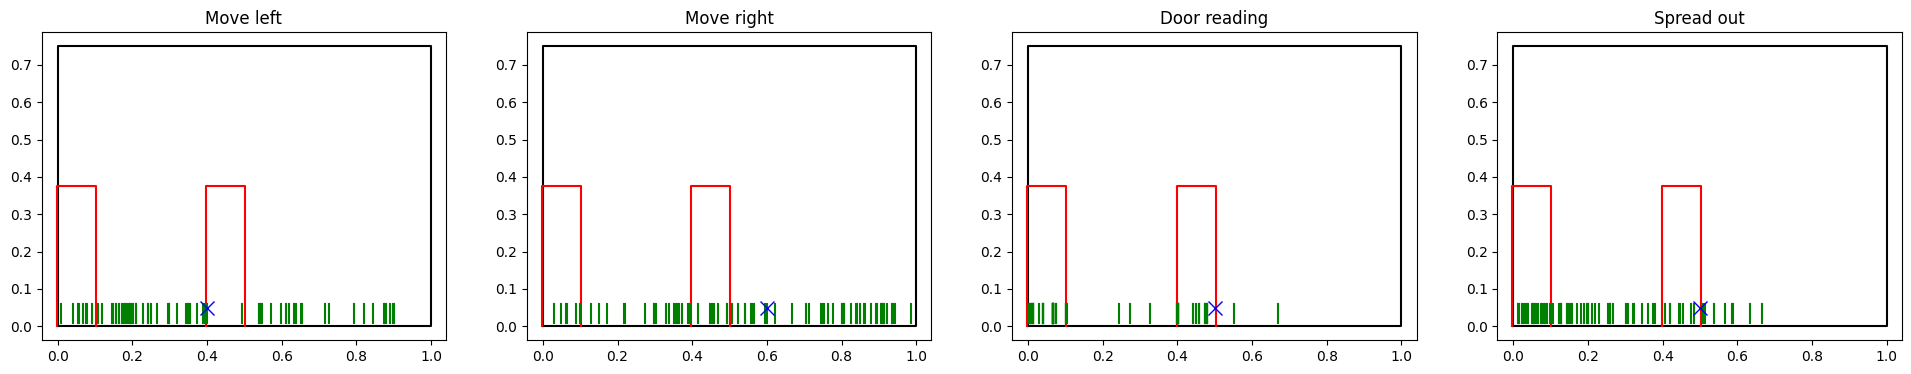

In [48]:
fig, axs = plt.subplots(1, 4, figsize=(24, 4))

n_particles = 75

# Move to the left
axs[0].set_title("Move left")
robot_ground_truth.robot_loc = 0.4
particle_filter.reset_particles(n_particles)
particle_filter.update_particles_move_continuous(robot_ground_truth, -0.1)
particle_filter.plot_particles_with_weights(axs[0], world_ground_truth, robot_ground_truth)
axs[0].axis('equal')

axs[1].set_title("Move right")
robot_ground_truth.robot_loc = 0.6
particle_filter.reset_particles(n_particles)
particle_filter.update_particles_move_continuous(robot_ground_truth, 0.1)
particle_filter.plot_particles_with_weights(axs[1], world_ground_truth, robot_ground_truth)
axs[1].axis('equal')

axs[2].set_title("Door reading")
robot_ground_truth.robot_loc = 0.5
particle_filter.reset_particles(n_particles)
# Pile up particles in front of doors
for _ in range(0, 2):
    particle_filter.calculate_weights_door_sensor_reading(world_ground_truth, robot_sensor, True)
    particle_filter.resample_particles()
particle_filter.plot_particles_with_weights(axs[2], world_ground_truth, robot_ground_truth)
axs[2].axis('equal')

# "Don't" move for 2 iterations - but should still spread particles out
axs[3].set_title("Spread out")
for _ in range(0, 2):
    particle_filter.update_particles_move_continuous(robot_ground_truth, 0.0)
    
particle_filter.plot_particles_with_weights(axs[3], world_ground_truth, robot_ground_truth)
axs[3].axis('equal')


<!-- END QUESTION -->

## Do one full loop
Do a move, sensor loop a few times

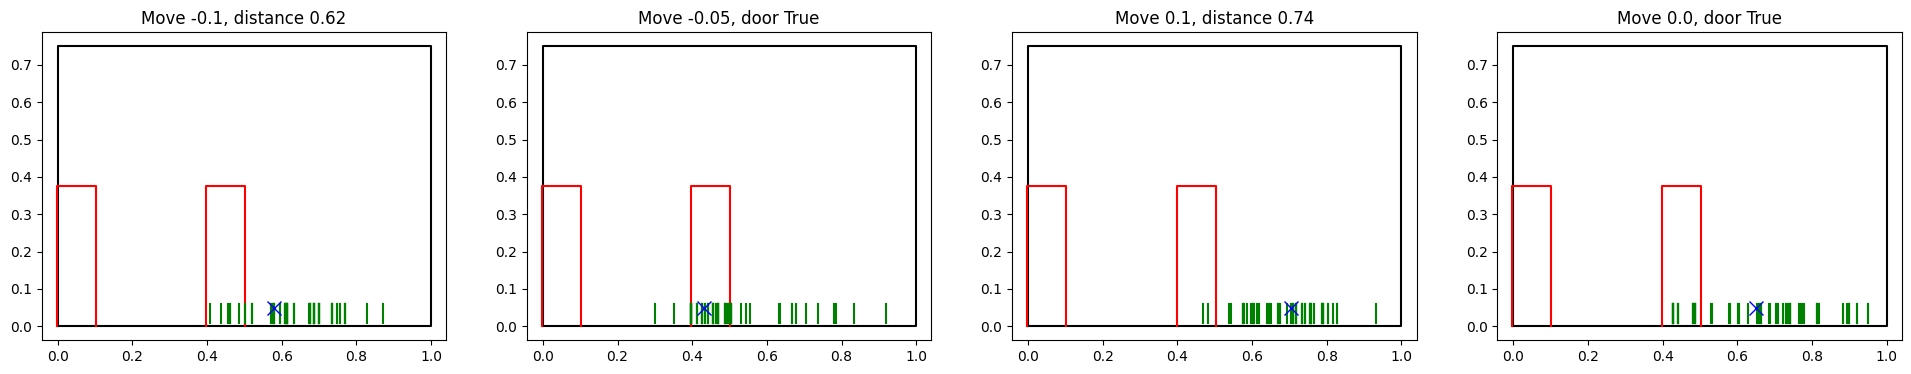

In [49]:
fig, axs = plt.subplots(1, 4, figsize=(24, 4))

n_particles = 75

# Moves followed by door, then distance, then door, then distance reading
moves = [-0.1, -0.05, 0.1, 0.0]

particle_filter.reset_particles(n_particles)
robot_ground_truth.robot_loc = 0.5

np.random.seed(3)

for i, u in enumerate(moves):
    robot_ground_truth.move_continuous(u)
    if i % 2:
        saw_door = robot_sensor.query_door(robot_ground_truth, world_ground_truth)
        particle_filter.one_full_update_door(world_ground_truth, robot_ground_truth, robot_sensor, u, saw_door)
        axs[i].set_title(f"Move {u}, door {saw_door}")
    else:
        dist = robot_sensor.query_distance_to_wall(robot_ground_truth)
        particle_filter.one_full_update_distance(robot_ground_truth, robot_sensor, u, dist)
        axs[i].set_title(f"Move {u}, distance {dist:0.2f}")
    
    axs[i].axis('equal')
    particle_filter.plot_particles_with_weights(axs[i], world_ground_truth, robot_ground_truth)


## Hours and collaborators
Required for every assignment - fill out before you hand-in.

Listing names and websites helps you to document who you worked with and what internet help you received in the case of any plagiarism issues. You should list names of anyone (in class or not) who has substantially helped you with an assignment - or anyone you have *helped*. You do not need to list TAs.

Listing hours helps us track if the assignments are too long.

In [50]:

# List of names (creates a set)
worked_with_names = {"None"}
# List of URLS (creates a set)
websites = {"None"}
# Approximate number of hours, including lab/in-class time
hours = 5

# for all row, column in all_indices_from_where
#.   if this is the column for wrist torque 
#.      print(f"Row: {r}, Time step: {c // n_time_steps} Successful y/n: {pick_data[r, -1] == 1}, value: {pick_data[r, c]}")

In [51]:
grader.check("hours_collaborators")

hours_collaborators results: All test cases passed!

## Submission

Make sure you have run all cells in your notebook in order before running the cell below, so that all images/graphs appear in the output. The cell below will generate a zip file for you to submit. **Please save before exporting!**

Submit through gradescope, particle filter. Include JUST this .ipynb file and ALL of the .py files in the RobotHallway folder

In [52]:
# Save your notebook first, then run this cell to export your submission.
grader.export(run_tests=True)

UnicodeDecodeError: 'charmap' codec can't decode byte 0x9d in position 6367: character maps to <undefined>